# Processing SAGE Phoenix data with Aurora

This is an example of how to process data collected with a Phoenix MTU-5c data with Aurora.  For now this assumes that an MTH5 has already been created. 

## Process With Aurora

In [1]:
# Required imports for the program.
%matplotlib widget

from pathlib import Path
import warnings

from aurora.config.config_creator import ConfigCreator
from aurora.pipelines.process_mth5 import process_mth5
from aurora.pipelines.run_summary import RunSummary
from aurora.transfer_function.kernel_dataset import KernelDataset

from mth5.helpers import close_open_files
from mtpy import MT

warnings.filterwarnings("ignore")

2023-06-16 14:25:14,728 [line 135] mth5.setup_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mth5\logs\mth5_debug.log
2023-06-16 14:25:14,931 [line 113] matplotlib.get_mtpy_logger - INFO: Logging file can be found C:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\mtpy\logs\matplotlib_warn.log


## Set paths

Set path the the `local` and `remote` reference stations, both paths and IDs.

In [2]:
local_station = "102"
local_mth5_path = Path(r"c:\Users\jpeacock\OneDrive - DOI\MTData\SAGE2023\102_060923\mth5_from_phoenix.h5")

remote_station = None
remote_mth5_path = None


## Create Run Summary

Create a run summary for a single sample rate for local and remote stations.


In [3]:
close_open_files()

sample_rate = 24000
mth5_run_summary = RunSummary()
if remote_mth5_path is not None:
    mth5_run_summary.from_mth5s([local_mth5_path, remote_mth5_path])
else:
    mth5_run_summary.from_mth5s([local_mth5_path])
run_summary = mth5_run_summary.clone()
run_summary.add_duration()
run_summary.df = run_summary.df[run_summary.df.sample_rate == sample_rate].iloc[:]
run_summary.mini_summary

2023-06-16 14:25:41,572 [line 758] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing c:\Users\jpeacock\OneDrive - DOI\MTData\SAGE2023\102_060923\mth5_from_phoenix.h5


,survey,station_id,run_id,start,end
1,VAL,102,sr24k_0001,2023-06-07 17:46:01+00:00,2023-06-07 17:46:02.999958333+00:00
2,VAL,102,sr24k_0002,2023-06-07 17:52:01+00:00,2023-06-07 17:52:02.999958333+00:00
3,VAL,102,sr24k_0003,2023-06-07 17:58:01+00:00,2023-06-07 17:58:02.999958333+00:00
4,VAL,102,sr24k_0004,2023-06-07 18:04:01+00:00,2023-06-07 18:04:02.999958333+00:00
5,VAL,102,sr24k_0005,2023-06-07 18:10:01+00:00,2023-06-07 18:10:02.999958333+00:00
...,...,...,...,...,...
466,VAL,102,sr24k_0466,2023-06-09 16:16:01+00:00,2023-06-09 16:16:02.999958333+00:00
467,VAL,102,sr24k_0467,2023-06-09 16:22:01+00:00,2023-06-09 16:22:02.999958333+00:00
468,VAL,102,sr24k_0468,2023-06-09 16:28:01+00:00,2023-06-09 16:28:02.999958333+00:00
469,VAL,102,sr24k_0469,2023-06-09 16:34:01+00:00,2023-06-09 16:34:02.999958333+00:00


## Create Kernel Dataset

This sets the runs for Aurora to process.  

In [4]:
kernel_dataset = KernelDataset()
if remote_station is not None:
    kernel_dataset.from_run_summary(run_summary, zen_station, rr_zen_station)
else:
    kernel_dataset.from_run_summary(run_summary, local_station)
mimimum_run_duration = 1  # seconds
kernel_dataset.drop_runs_shorter_than(mimimum_run_duration)
kernel_dataset.mini_summary

,survey,station_id,run_id,start,end,duration
0,VAL,102,sr24k_0001,2023-06-07 17:46:01+00:00,2023-06-07 17:46:02.999958333+00:00,1.999958
1,VAL,102,sr24k_0002,2023-06-07 17:52:01+00:00,2023-06-07 17:52:02.999958333+00:00,1.999958
2,VAL,102,sr24k_0003,2023-06-07 17:58:01+00:00,2023-06-07 17:58:02.999958333+00:00,1.999958
3,VAL,102,sr24k_0004,2023-06-07 18:04:01+00:00,2023-06-07 18:04:02.999958333+00:00,1.999958
4,VAL,102,sr24k_0005,2023-06-07 18:10:01+00:00,2023-06-07 18:10:02.999958333+00:00,1.999958
...,...,...,...,...,...,...
465,VAL,102,sr24k_0466,2023-06-09 16:16:01+00:00,2023-06-09 16:16:02.999958333+00:00,1.999958
466,VAL,102,sr24k_0467,2023-06-09 16:22:01+00:00,2023-06-09 16:22:02.999958333+00:00,1.999958
467,VAL,102,sr24k_0468,2023-06-09 16:28:01+00:00,2023-06-09 16:28:02.999958333+00:00,1.999958
468,VAL,102,sr24k_0469,2023-06-09 16:34:01+00:00,2023-06-09 16:34:02.999958333+00:00,1.999958


## Create Aurora Configuration

Create the Aurora configuration file.  These are the parameters to tell Aurora how to run.

In [5]:
cc = ConfigCreator()
config = cc.create_from_kernel_dataset(
    kernel_dataset,
    emtf_band_file=r"c:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\aurora\aurora\config\emtf_band_setup\bs_six_level.cfg",
)

# need to update the channel nomenclature to what phoenix uses
config.channel_nomenclature.ex = "e1"
config.channel_nomenclature.ey = "e2"
config.channel_nomenclature.hx = "h1"
config.channel_nomenclature.hy = "h2"
config.channel_nomenclature.hz = "h3"

for decimation in config.decimations:
    if remote_station is not None:
        decimation.estimator.engine = "RME_RR"
    else:
        decimation.estimator.engine = "RME"
    decimation.window.type = "dpss"
    decimation.window.additional_args = {"alpha":2.5}
    decimation.output_channels = ["e1", "e2", "h3"]
    decimation.input_channels = ["h1", "h2"]
    decimation.window.overlap = 64
    decimation.window.num_samples = 128

c:\Users\jpeacock\OneDrive - DOI\Documents\GitHub\aurora\aurora\config\emtf_band_setup\bs_six_level.cfg
OK


## Process

Now that everything is set up, estimate a transfer functions and create an EDI and figure.

('VAL', '102', 'sr24k_0001', Timestamp('2023-06-07 17:46:01+0000', tz='UTC'))
  survey station_id      run_id                     start  \
0    VAL        102  sr24k_0001 2023-06-07 17:46:01+00:00   
1    VAL        102  sr24k_0001 2023-06-07 17:46:01+00:00   
2    VAL        102  sr24k_0001 2023-06-07 17:46:01+00:00   
3    VAL        102  sr24k_0001 2023-06-07 17:46:01+00:00   
4    VAL        102  sr24k_0001 2023-06-07 17:46:01+00:00   
5    VAL        102  sr24k_0001 2023-06-07 17:46:01+00:00   

                                  end input_channels output_channels  \
0 2023-06-07 17:46:02.999958333+00:00             []              []   
1 2023-06-07 17:46:02.999958333+00:00             []              []   
2 2023-06-07 17:46:02.999958333+00:00             []              []   
3 2023-06-07 17:46:02.999958333+00:00             []              []   
4 2023-06-07 17:46:02.999958333+00:00             []              []   
5 2023-06-07 17:46:02.999958333+00:00             []          

2023-06-16 17:01:38,332 [line 758] mth5.mth5.MTH5.close_mth5 - INFO: Flushing and closing c:\Users\jpeacock\OneDrive - DOI\MTData\SAGE2023\102_060923\mth5_from_phoenix.h5


=== FINISHED ===


2023-06-16 17:01:39,175 [line 337] mt_metadata.base.metadata.define_measurement.write_measurement - WARNING: No XMEAS information.
2023-06-16 17:01:39,198 [line 337] mt_metadata.base.metadata.define_measurement.write_measurement - WARNING: No XMEAS information.


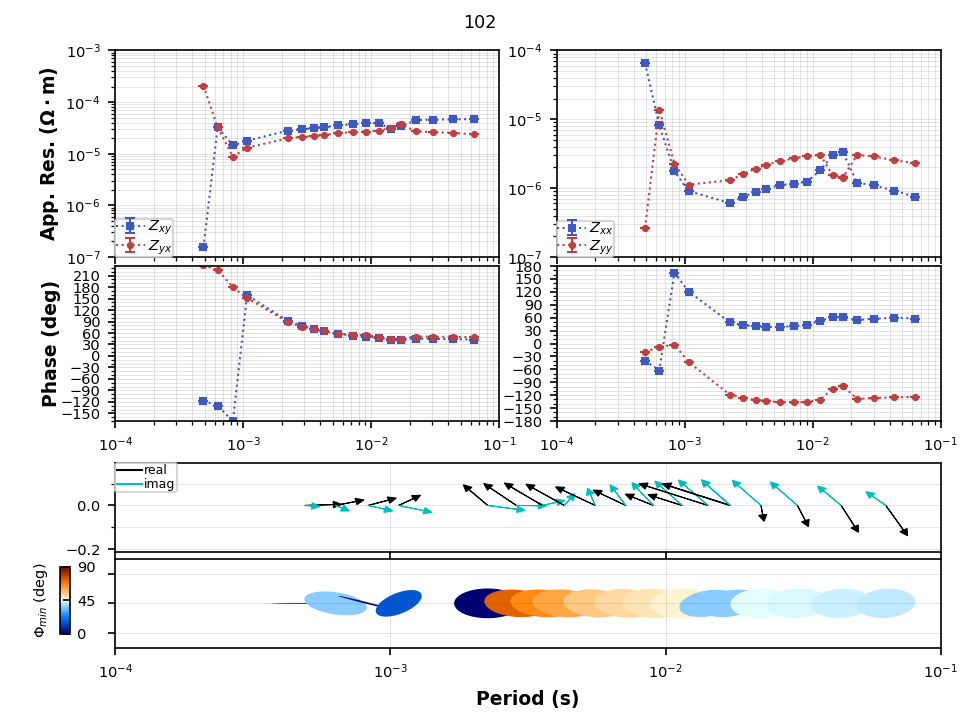

NameError: name 'save_path' is not defined

In [6]:
%%time
tf_cls = process_mth5(
    config,
    kernel_dataset,
    units="MT",
    show_plot=False,
    z_file_path=None,
)
print("=== FINISHED ===")

edi = tf_cls.write(local_mth5_path.parent.joinpath(f"{local_station}_{sample_rate}.edi"))

# plot with MTpy
mt_obj = MT()
mt_obj.read(edi.fn)
p1 = mt_obj.plot_mt_response(fig_num=1, plot_num=2)
p1.save_plot(local_mth5_path.parent.joinpath(f"{edi.fn.stem}.png"), fig_dpi=300, close_plot=False)